# Lab One: Exploring Table Data

#### Garrett Webb, Jackson Heck, Maria Harrison

## 1. Business Understanding

[1.5 points] In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?

In the late 1960s, Former President of the Republic of Indonesia Suharto instituted a population policy and introduced a variety of government programs. One of these was the national family planning (FP) program which hoped to halt the high population growth rate. This program pushed the use of contraceptives by educating about contraceptive methods and offering free contraceptives.

Roughly two decades later, the government conducted the 1987 National Indonesia Contraceptive Prevalnce Survey. This dataset, a subset of the aforementioned survey, has 1473 samples and 10 features, including both categorical and numerical features. It is free to download at https://archive.ics.uci.edu/ml/datasets/. 

By exploring the relationships between the attributes and visualizing the attributes, we will be able to determine what factors determine if a woman might choose to use contraceptive methods. At the same time, we might get some insight into which factors play a role in deciding to not use contraception. The factors that we will investigate include age, education level, religious views, occupation, media exposure, and standard of living. Additionally, we will be able to recommend which programs may need increased funding or involvement in order to increase the use of contraception. 

============================================================================================================================================================================


Dataset: Contraceptive Method Choice Data Set URL: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

## 2. Data Understanding

[1.5 points] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  

### Define Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./cmc.data')

df.head()

,wife_age,wife_education_level,husband_education_level,num_children,isMuslim,isNotWorking,husband_occupation,standard_of_living,isNotExposedToMedia,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


Let's see what the current data types of each attribute is.

In [17]:
# find data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   wife_age                   1473 non-null   int64
 1   wife_education_level       1473 non-null   int64
 2   husband_education_level    1473 non-null   int64
 3   num_children               1473 non-null   int64
 4   isMuslim                   1473 non-null   int64
 5   isNotWorking               1473 non-null   int64
 6   husband_occupation         1473 non-null   int64
 7   standard_of_living         1473 non-null   int64
 8   isNotExposedToMedia        1473 non-null   int64
 9   contraceptive_method_used  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB
None


From this information, we can see that all the data has the same data type, non-null int64. In our dataset, we have two types of data: categorical (nominal) and ordinal. 

The categorical attributes include: 'isMuslim', 'isNotWorking', 'husband_occupation','isNotExposeToMedia', and 'contraceptive_method_used'.

The ordinal attributes include: 'wife_age', 'wife_education_level', 'husband_education_level', 'num_children', and 'standard_of_living'.

Since ordinal features should be of the type non-null int64, then only the categorical (nominal) features should be changed. However, in the current view, all values are represented as integers. If we wanted to represent some of the categorical values as strings, then we would change the data type to non-null object. This is what that would look like:

In [18]:
# replace husband's occupation to string
df.husband_occupation.replace(to_replace = [1,2,3,4],
                              value = ['professional,technical, or clerical', 'sales, services', 'manual', 'agriculture'],
                              inplace = True)

# replace contraceptive method used to string
df.contraceptive_method_used.replace(to_replace = [1,2,3],
                                     value = ['no use', 'long-term use', 'short-term use'],
                                     inplace = True)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   wife_age                   1473 non-null   int64 
 1   wife_education_level       1473 non-null   int64 
 2   husband_education_level    1473 non-null   int64 
 3   num_children               1473 non-null   int64 
 4   isMuslim                   1473 non-null   int64 
 5   isNotWorking               1473 non-null   int64 
 6   husband_occupation         1473 non-null   object
 7   standard_of_living         1473 non-null   int64 
 8   isNotExposedToMedia        1473 non-null   int64 
 9   contraceptive_method_used  1473 non-null   object
dtypes: int64(8), object(2)
memory usage: 115.2+ KB
None


,wife_age,wife_education_level,husband_education_level,num_children,isMuslim,isNotWorking,husband_occupation,standard_of_living,isNotExposedToMedia,contraceptive_method_used
0,24,2,3,3,1,1,"sales, services",3,0,no use
1,45,1,3,10,1,1,manual,4,0,no use
2,43,2,3,7,1,1,manual,4,0,no use
3,42,3,2,9,1,1,manual,3,0,no use
4,36,3,3,8,1,1,manual,2,0,no use


By changing the numeric values to strings, the data types of those columns ('husband_occupation' and 'contraceptive_method_used') have changed to non-null object. While we technically could change the rest of the categorical features, the remaining features are binary and are best visualized with numerics values, 0 and 1. 

### Verify Data Quality

[1.5 points] Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  

First, we will check to see if there are any missing values.

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   wife_age                   1473 non-null   int64 
 1   wife_education_level       1473 non-null   int64 
 2   husband_education_level    1473 non-null   int64 
 3   num_children               1473 non-null   int64 
 4   isMuslim                   1473 non-null   int64 
 5   isNotWorking               1473 non-null   int64 
 6   husband_occupation         1473 non-null   object
 7   standard_of_living         1473 non-null   int64 
 8   isNotExposedToMedia        1473 non-null   int64 
 9   contraceptive_method_used  1473 non-null   object
dtypes: int64(8), object(2)
memory usage: 115.2+ KB
None


Based on this information, there are no missing values from this dataset since each column has 1473 rows, which is the amount of samples in this dataset. From a scan of the data, there appears to be no strange values in any of the columns. Each of the values match an expected value given for each column.

In [20]:
for col in df:
    print(col)
    print(df[col].unique())

wife_age
[24 45 43 42 36 19 38 21 27 44 26 48 39 37 46 40 29 31 33 25 28 47 32 49
 34 20 22 30 23 35 41 17 18 16]
wife_education_level
[2 1 3 4]
husband_education_level
[3 2 4 1]
num_children
[ 3 10  7  9  8  0  6  1  2  4  5 12 11 13 16]
isMuslim
[1 0]
isNotWorking
[1 0]
husband_occupation
['sales, services' 'manual' 'professional,technical, or clerical'
 'agriculture']
standard_of_living
[3 4 2 1]
isNotExposedToMedia
[0 1]
contraceptive_method_used
['no use' 'long-term use' 'short-term use']


From these results, we can verify there are no strange values for any of the columns. 

Now, we will check if duplicate data exists in the dataset.

In [21]:
# df[df.duplicated()]

In [22]:
# find the number of duplicates
len(df[df.duplicated()])

48

This shows that 48 samples are duplicates. Unfortunately, it is difficult to determine if they are true duplicates since the dataset does not include any uniquely identifying information about each individual such as name, date of birth, or single identity number from an Indonesian identiy card. 

Since there are no missing values and not enough information to verify the duplicates, there is no need to impute any missing information or drop any instances or features.

## Data Visualization

[2 points] Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical. 
[2.5 points] Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data.  Important: Interpret the implications for each visualization. 

<AxesSubplot: >

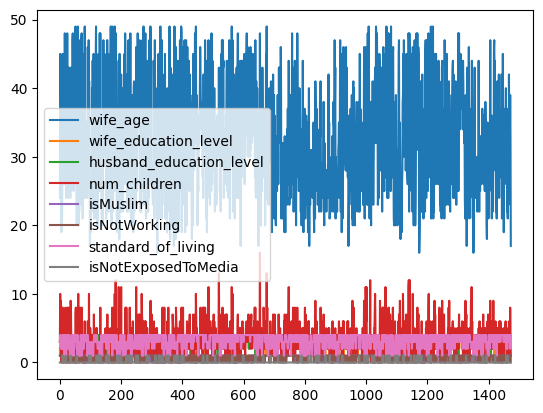

In [23]:
df.plot()

In [56]:
df.boxplot(column='num_children', by='contraceptive_method_used' vert=False)

SyntaxError: invalid syntax (1987952781.py, line 1)

## Additional Analysis